## Install Keras

## Loading the MNIST dataset in Keras

In [2]:
from keras.datasets import mnist
import tensorflow as tf

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

## Create network architecture

In [6]:
from keras import models
from keras import layers

In [7]:
network = models.Sequential()

- This is the same as calling tf.keras.Sequential() or tf.keras.models.Sequential()

In [8]:
network = tf.keras.models.Sequential()

In [9]:
network.add(layers.Dense(512, activation="relu", input_shape=(28*28,)))
network.add(layers.Dense(10, activation="softmax"))

## Compilation step

- A loss function.  How the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.
- An optimizer.   The mechanism through which the network will update itself based on the data it sees and its loss function.
- Metrics to monitor during training and testing—Here, we’ll only care about accuracy (the fraction of the images that were correctly classified). 

In [10]:
network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Preparing the image data

- Images are of size $28$ X $28$ pixels

- Images are tensors of type $unit8$. This should be converted to type $float32$

- Images should be normalized so that channels are between 0 and 1 and not \[0, 255]

In [11]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255

In [12]:
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32")/255

## Preparing the labels

In [13]:
from keras.utils import to_categorical 

In [14]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Train the network

In [15]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.4537 - accuracy: 0.8715 2s -
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1143 - accuracy: 0.9678
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0692 - accuracy: 0.9803
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0485 - accuracy: 0.9857
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0336 - accuracy: 0.9907


## Test the network

In [16]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.0662 - accuracy: 0.9796


# EXAMPLE 2: IRIS DATASET

In [88]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.model_selection import train_test_split

In [89]:
iris = load_iris()
X = iris["data"]
y = iris["target"]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [91]:
network = models.Sequential()

network.add(layers.Dense(16, activation="sigmoid", input_shape=(4, )))
network.add(layers.Dense(3, activation="softmax"))

In [92]:
network.compile(optimizer ="adam", loss= "categorical_crossentropy" , metrics=["accuracy"])

In [93]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [95]:
network.fit(X_train, y_train, epochs=200, batch_size=2, verbose=False)

# IMDB DATASET

In [1]:
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

## How to decode word index?

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for key, value in word_index.items()])

1646592/1641221 [==============================] - 0s 0us/step


In [10]:
decoded_reveiw = ' '.join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

## Preparing the data

- One-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. Then you  could use as the first layer in your network a Dense layer, capable of handling floating-point vector data.

In [11]:
import numpy as np

In [16]:
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [17]:
X_train = vectorize_sequence(train_data)
X_test = vectorize_sequence(test_data)

In [19]:
y_train = np.asarray(train_labels.astype("float32"))
y_test = np.asarray(test_labels.astype('float32'))

## The model definition

In [21]:
from keras import models, layers

In [22]:
network = models.Sequential()

In [23]:
network.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
network.add(layers.Dense(16, activation="relu"))
network.add(layers.Dense(1, activation="sigmoid"))
            

## Compiling the model

In [24]:
network.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

- Sometimes you may want to configure the parameters of your optimizer or pass a custom loss function or metric function

- The former can be done by passing an optimizer class instance as the optimizer argument; the latter can be done by passing function objects as the loss and/or metrics arguments.

## Configuring the optimizer

In [26]:
from keras import optimizers

In [28]:
network.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

## Using custom losses and metrics

In [29]:
from keras import losses, metrics

In [31]:
network.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.binary_crossentropy,
               metrics=[metrics.binary_accuracy])

## Setting aside a validation set

In [32]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Training The model

In [34]:
history = network.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 20s 377ms/step - loss: 0.6208 - binary_accuracy: 0.6944 - val_loss: 0.3899 - val_binary_accuracy: 0.8632
Epoch 2/20
30/30 [==============================] - 4s 128ms/step - loss: 0.3183 - binary_accuracy: 0.8960 - val_loss: 0.2960 - val_binary_accuracy: 0.8847
Epoch 3/20
30/30 [==============================] - 4s 123ms/step - loss: 0.2106 - binary_accuracy: 0.9310 - val_loss: 0.2771 - val_binary_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 3s 117ms/step - loss: 0.1533 - binary_accuracy: 0.9527 - val_loss: 0.2849 - val_binary_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 4s 123ms/step - loss: 0.1190 - binary_accuracy: 0.9672 - val_loss: 0.2990 - val_binary_accuracy: 0.8861
Epoch 6/20
30/30 [==============================] - 4s 124ms/step - loss: 0.0888 - binary_accuracy: 0.9789 - val_loss: 0.3180 - val_binary_accuracy: 0.8810
Epoch 7/20
30/30 [==============================] - 4s 141ms/st

## Plotting the training and validation loss

In [36]:
import matplotlib.pyplot as plt 

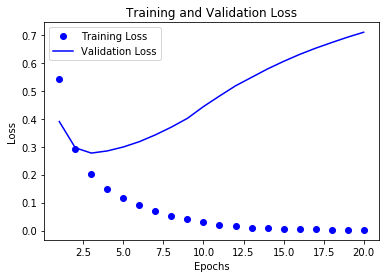

In [37]:
loss = history.history["loss"]
val_loss = history.history['val_loss']


epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

## Plotting the training and validation accuracy

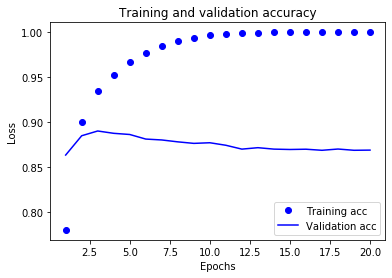

In [41]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

- The network begins to overfit after 2 epochs. Let’s train a new network from scratch for nine epochs and then evaluate it on the test set.

## Retraining a model from scratch

In [49]:
network = models.Sequential()

network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

network.fit(X_train, y_train, epochs=3, batch_size=512)

results = network.evaluate(X_test, y_test)

Epoch 1/3
49/49 [==============================] - 5s 17ms/step - loss: 0.5641 - accuracy: 0.7447
Epoch 2/3
49/49 [==============================] - 1s 15ms/step - loss: 0.2869 - accuracy: 0.9040
Epoch 3/3
782/782 [==============================] - 5s 2ms/step - loss: 0.2810 - accuracy: 0.8883


## generate predictions on new data

In [50]:
y_test_predict = network.predict(X_test)

In [ ]:

## Creat a function called rk4solve or whatever name you want

## Specify y_initial and time_step

## y_initial is your list of initial y_values'


def rk4solve(y_initial, time_step, duration):

    
    dt = time-step                       # time step for integration

    num_ode = len(self.init)              # number of odes
    
    y = np.zeros((num_ode, t_step))  # save all avriables for plotting. shape = (Number of ODEs, Number of simulation time_points )
                                    # Example, y[1, 50] corresponds to the value of the function in postion 1 at the 50th time_point
    for i in range(len(y_init)):
        y[i, 0] = y_initial[i]

    tt = 0                       # initialize time t = 0
    t = np.zeros((duration, 0))  # time array for plotting 
    
    # Runge-kutta 4
    
    for i in range(1, duration):
        
        yn = y[:, i - 1]         # variable values at previous time step

        ## diff_eqns is your function containing the ode's and must return a list corresponding to y_initial
        
        k1 = diff_eqns(tt, yn)
        k2 = diff_eqns(tt, yn + [k1i * (dt / 2) for k1i in k1])
        k3 = diff_eqns(tt, yn + [k2i * (dt / 2) for k2i in k2])
        k4 = diff_eqns(tt, yn + [k3i * dt for k3i in k3])
        k_in = [k1[i] + [2 * k2i for k2i in k2][i] + [2 * k3i for k3i in k3][i] + k4[i] for i in range(len(k4))]
        yn = yn + [k_ini * (dt / 6) for k_ini in k_in]


        y[:, i] = yn      # update the new value of all variables
        tt = i * dt       # generate time value for next simulation step
        t[i, 0] = i * dt  # generate time array for plotting
    return [y, t]

y_intial = [                            ]
time_step = 
duration = 
y, t = rk4solve(y_initial, time_step, duration)
